In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split  # To split the sets.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
games = pd.read_csv('games.csv')

In [5]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [6]:
print(games.shape)

(81312, 20)


In [7]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


Here, our target variable is 'average_rating', which is the average of all the user ratings for a boardgame. It could be interesting to predict the average score that a human would give to a new, unreleased, board game. Predicting this column would be useful for board game manufacturers who are thinking of what kind of game to make next. 

In [10]:
plt.hist(games['average_rating'])

(array([ 24380.,    606.,   1325.,   3303.,   6687.,  12277.,  15849.,
         11737.,   3860.,   1288.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

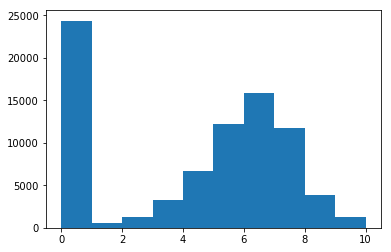

In [9]:
plt.show()

From above plot it comes to know that there are quite few games with 0 ratings. The shape of distribution is right-skew, and a mean around 6 (on removing 0).

In [11]:
games[games['average_rating'] == 0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0
13127,962,boardgame,Contango,2000.0,2.0,6.0,90.0,90.0,90.0,10.0,0,0.0,0.0,0,0,0,2,1,0,0.0
13169,1097,boardgame,Don't Give Up Your Day Job!,2000.0,6.0,41.0,120.0,120.0,120.0,8.0,0,0.0,0.0,0,0,0,2,0,0,0.0
13180,1151,boardgame,"Money, Power, Respect",2000.0,2.0,6.0,90.0,90.0,90.0,8.0,0,0.0,0.0,1,0,0,2,0,0,0.0
13181,1154,boardgame,Nuts! To You,1987.0,2.0,2.0,20.0,20.0,20.0,6.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13188,1180,boardgame,Tower of Babylon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,5,0,2,2,0,0,0.0


In [14]:
print(games[games['average_rating'] == 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


In [15]:
print(games[games['average_rating'] > 0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


From above two statements it comes to know that the game which has average rating 0 has no reviews (users_rated column is 0).
So by filtering out any board games with 0 reviews we can remove much of the noise.

In [16]:
games = games[games['users_rated'] > 0]

Also, remving any row with null values

In [17]:
games = games.dropna(axis=0)

In [20]:
kmeans_model = KMeans(n_clusters=5, random_state=1)

Get only numeric columns from games

In [21]:
num_columns = games._get_numeric_data()

In [22]:
# Fit the model with numeric columns
kmeans_model.fit(num_columns)
# Get the cluster assignments
labels = kmeans_model.labels_

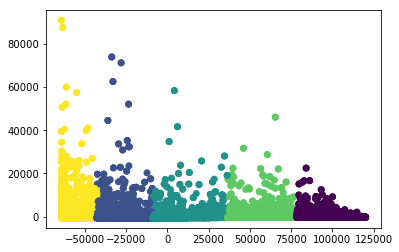

In [27]:
# Create a PCA model with 2 columns
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns
plot_columns = pca_2.fit_transform(num_columns)
plt.scatter(x=plot_columns[:, 0], y=plot_columns[:, 1], c=labels)
plt.show()

Now lets us find which column might be interseting or works well with our 'average_rating' column. One way is to use correlation between average_rating and other columns

In [28]:
games.corr()['average_rating']

id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

From above stats, it is seen clearly that id and average_weight correlate best to ratings. ids are presumably assigned when the game is added to the database, so this likely indicates that games created later score higher in the ratings. Maybe reviewers were not as nice in the early days of BoardGameGeek, or older games were of lower quality. average_weight indicates the "depth" or complexity of a game, so it may be that more complex games are reviewed better.

Let's select the columns which are only relevant to our training algorithm. Since Machine learning model doesn't work well with text data so also removing that.

In [30]:
columns = games.columns.tolist()
# Filtering the non-required columns
columns = [c for c in columns if c not in ['bayes_average_rating', 'average_rating', 'type', 'name']]
target = 'average_rating'

Generating the training and test set with 80% and 20% of data respectively

In [44]:
train = games.sample(frac=0.8, random_state=1)
# Select anything not in training set and put in testing set
test = games.loc[~games.index.isin(train.index)]
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


# Fitting a linear regression

Linear regression is a powerful and commonly used machine learning algorithm. It predicts the target variable using linear combinations of the predictor variables.

In [36]:
model = LinearRegression()
# Fit the model to training data
model.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predicting error

After we train the model, we can make predictions on new data with it. This new data has to be in the exact same format as the training data, or the model won't make accurate predictions. 

In [40]:
# Generate our predictions for test set
predictions = model.predict(test[columns])
# Compute the error between test predictions and actual values
mean_squared_error(predictions, test[target])

1.8239281903519868